In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Initialize weights and bias
weights = np.zeros(X_train.shape[1])
bias = 0

# Set learning rate and number of iterations
learning_rate = 0.01
iterations = 1000

In [5]:
# Store training and testing accuracy
train_accuracy = []
test_accuracy = []

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [6]:
# Logistic Regression
for i in range(iterations):
    # Forward propagation
    z = np.dot(X_train, weights) + bias
    y_pred_train = sigmoid(z)
    
    # Backward propagation
    dw = (1 / len(X_train)) * np.dot(X_train.T, (y_pred_train - y_train))
    db = (1 / len(X_train)) * np.sum(y_pred_train - y_train)
    
    # Update weights and bias
    weights -= learning_rate * dw
    bias -= learning_rate * db
    
    # Calculate training accuracy
    y_pred_train = [1 if p > 0.5 else 0 for p in y_pred_train]
    train_accuracy.append(np.mean(y_pred_train == y_train))
    
    # Calculate testing accuracy
    y_pred_test = sigmoid(np.dot(X_test, weights) + bias)
    y_pred_test = [1 if p > 0.5 else 0 for p in y_pred_test]
    test_accuracy.append(np.mean(y_pred_test == y_test))


C:\Users\heman\AppData\Local\Temp\ipykernel_44772\2895848704.py:7: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [7]:
# Print confusion matrix, sensitivity, specificity
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix:')
print(cm)
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
print('Sensitivity : ', sensitivity )
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print('Specificity : ', specificity)

Confusion Matrix:
[[61  2]
 [10 98]]
Sensitivity :  0.9682539682539683
Specificity :  0.9074074074074074


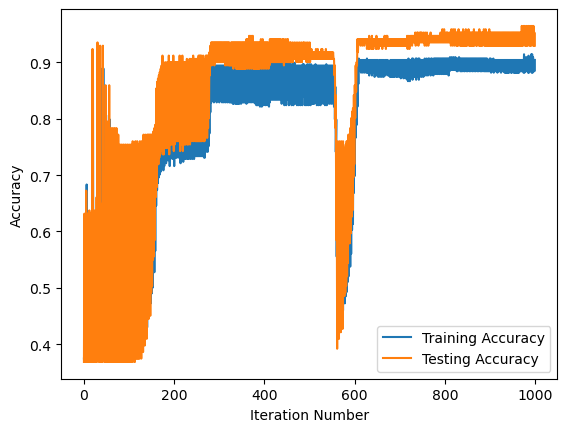

In [8]:
# Plot training and testing accuracy vs iteration number
plt.plot(range(iterations), train_accuracy, label='Training Accuracy')
plt.plot(range(iterations), test_accuracy, label='Testing Accuracy')
plt.xlabel('Iteration Number')
plt.ylabel('Accuracy')
plt.legend()
plt.show()